# Time Series Forecasting of Stock Market Data with ARIMA Model in python

# 1. Time Series Data
`Time series` data is a type of data that is collected over time at regular intervals. It is a sequence of data points that are ordered chronologically and can be used to analyze trends, patterns, and behaviors over time. Time series data can be collected from a variety of sources, such as sensors, financial markets, weather stations, and social media platforms.

Examples of time series data include stock prices, temperature readings, website traffic, and sales data. Time series data can be analyzed using various statistical and machine learning techniques, such as regression analysis, ARIMA models, and deep learning models.

Time series data is often used in forecasting and prediction applications, where the goal is to predict future values based on past observations. Time series analysis can also be used to identify anomalies, trends, and seasonality in the data, which can provide insights into the underlying processes that generate the data.

`Overall,` time series data is an important type of data that is used in many different fields, including finance, economics, engineering, and social sciences.

- `Time series` data is a sequence of data points collected over time that can be used to analyze trends and patterns. It can be collected from various sources and analyzed using statistical and machine learning techniques. 
- `Time series forecasting` is the process of predicting future values based on past observations. Time series data is used in many different fields, including finance, economics, engineering, and social sciences.

# Stock Market Data scraping in Python

In [28]:
# import libraries
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
import yfinance as yf
import datetime as dt
from datetime import date, timedelta
import plotly.graph_objects as go
import plotly.express as px

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [29]:
# define the dates to fetch data
today = date.today()
d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=365)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2
print("Your data will be between these dates: ", start_date, end_date)

Your data will be between these dates:  2023-08-26 2024-08-25


In [30]:
# deifne the ticker
ticker = 'GOOGL'

df = yf.download(ticker, start=start_date, end=end_date, progress=False)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-08-28,131.309998,132.539993,130.139999,131.009995,130.859802,20543300
2023-08-29,132.240005,136.570007,132.240005,134.570007,134.415741,43075600
2023-08-30,134.779999,136.279999,134.070007,135.880005,135.724228,28315800
2023-08-31,136.009995,138.000000,135.789993,136.169998,136.013901,30053800
2023-09-01,137.460007,137.460007,134.850006,135.660004,135.504486,21524600


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2023-08-28 to 2024-08-23
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       250 non-null    float64
 1   High       250 non-null    float64
 2   Low        250 non-null    float64
 3   Close      250 non-null    float64
 4   Adj Close  250 non-null    float64
 5   Volume     250 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


In [32]:
df.insert(0, "Date", df.index, True)
# df["Date"] = df.index
df.reset_index(drop=True, inplace=True)

In [33]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-08-28,131.309998,132.539993,130.139999,131.009995,130.859802,20543300
1,2023-08-29,132.240005,136.570007,132.240005,134.570007,134.415741,43075600
2,2023-08-30,134.779999,136.279999,134.070007,135.880005,135.724228,28315800
3,2023-08-31,136.009995,138.000000,135.789993,136.169998,136.013901,30053800
4,2023-09-01,137.460007,137.460007,134.850006,135.660004,135.504486,21524600


In [34]:
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,250,250.000000,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,2024-02-24 17:28:19.200000,150.957000,152.537240,149.618680,151.148560,151.017736,2.796837e+07
min,2023-08-28 00:00:00,122.879997,123.309998,120.209999,122.169998,122.029945,1.024210e+07
25%,2023-11-24 18:00:00,136.267494,137.902496,135.159996,136.432503,136.276104,2.143415e+07
50%,2024-02-26 12:00:00,144.750000,145.544998,143.559998,144.620003,144.454216,2.514165e+07
75%,2024-05-23 18:00:00,167.232494,168.417496,164.669998,167.134995,167.036209,3.104678e+07
max,2024-08-23 00:00:00,190.309998,191.750000,189.029999,191.179993,191.179993,8.436620e+07
std,NaN,17.935946,18.092727,17.790381,17.908373,17.945120,1.073890e+07


In [35]:
# make a plot on plotly
fig = px.line(df, x='Date', y=df.columns, title='Stock Price')
fig.show()

In [36]:
# select columns
df = df[['Date', 'Close']]
df.head()

,Date,Close
0,2023-08-28,131.009995
1,2023-08-29,134.570007
2,2023-08-30,135.880005
3,2023-08-31,136.169998
4,2023-09-01,135.660004


In [37]:
# plot the data to see how it looks like using plotly
fig = px.line(df, x='Date', y='Close', title='Google Stock Price')
fig.show()

In [38]:
# stationarity check on data
from statsmodels.tsa.stattools import adfuller
def adf_test(df):
    result = adfuller(df)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    if result[1] <= 0.05:
        print("Reject the null hypothesis. Data is stationary")
    else:
        print("Fail to reject the null hypothesis. Data is not stationary")

adf_test(df['Close'])

ADF Statistic: -1.303338
p-value: 0.627644
Fail to reject the null hypothesis. Data is not stationary


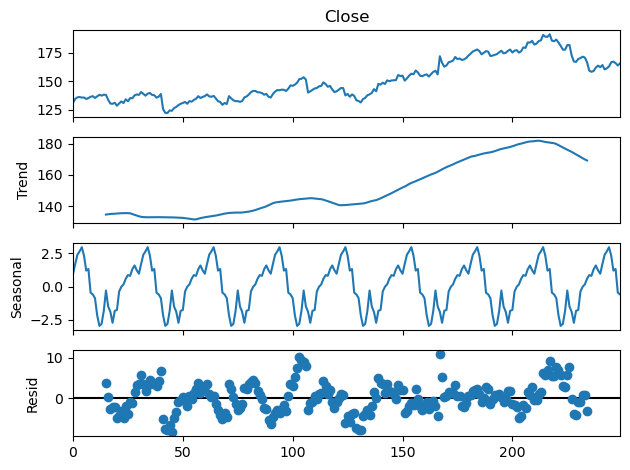

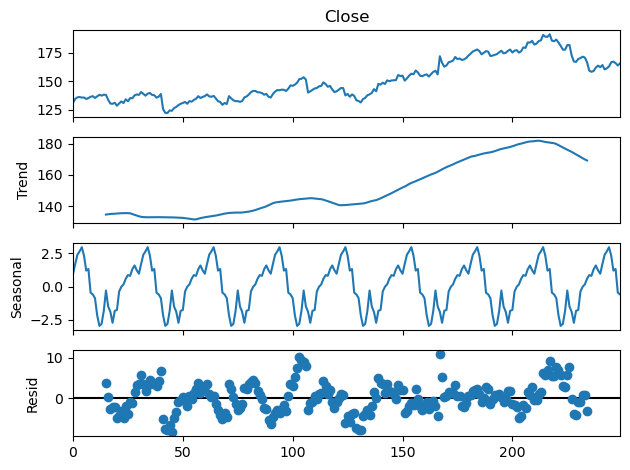

In [39]:
# decompose the data to see the trend, seasonality and noise
from statsmodels.tsa.seasonal import seasonal_decompose
decompose = seasonal_decompose(df['Close'], model='additive', period=30)
decompose.plot()

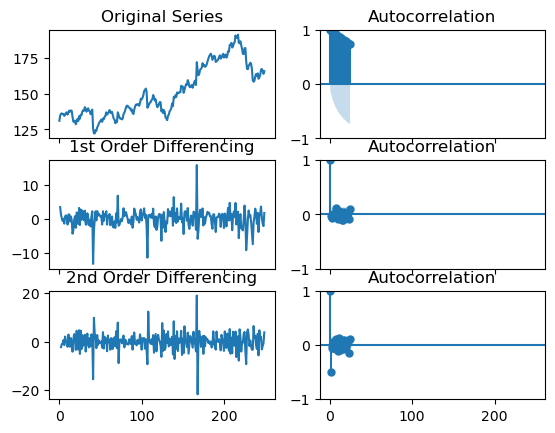

In [40]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df['Close']); axes[0, 0].set_title('Original Series')
plot_acf(df['Close'], ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df['Close'].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df['Close'].diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df['Close'].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df['Close'].diff().diff().dropna(), ax=axes[2, 1])

plt.show()

`d = 1`

# Lets find `p` value

In [41]:
# plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# pd.plotting.autocorrelation_plot(df['Close'])

plot_acf(df['Close'], alpha=0.05)

# from statsmodels.tsa.stattools import acf, pacf
# x_acf = pd.DataFrame(acf(df['Close']))
# print(x_acf)

           0
0   1.000000
1   0.985099
2   0.972003
3   0.959759
4   0.948844
5   0.937754
6   0.928162
7   0.917935
8   0.905405
9   0.892808
10  0.880701
11  0.869578
12  0.857505
13  0.847074
14  0.835605
15  0.825248
16  0.815562
17  0.806216
18  0.794814
19  0.783588
20  0.773448
21  0.762895
22  0.752158
23  0.740353


`p = 3`

# Lets find `q` value

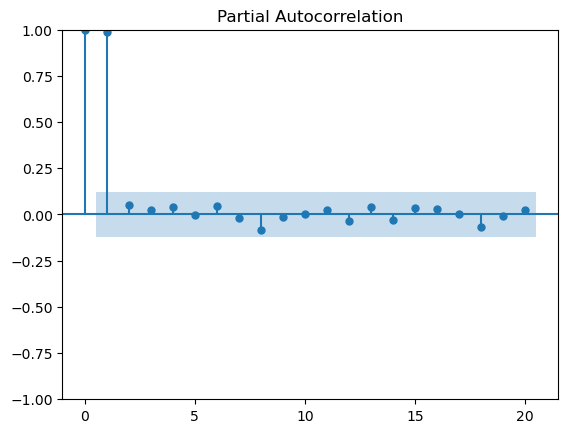

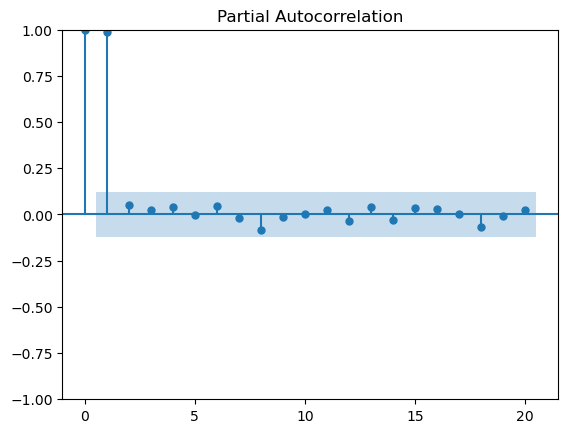

In [42]:
# partial autocorrelation
from statsmodels.tsa.stattools import acf, pacf
plot_pacf(df['Close'], lags=20, alpha=0.05)

#  The Points that are far from the others

In [43]:
# lets define p, d, q
p = 3
d = 1
q = 0

In [44]:
# lets run arima with pmdarima
from pmdarima.arima import auto_arima

model = auto_arima(df['Close'], start_p=1, start_q=1, max_p=3, max_q=2, m=12, start_P=0, seasonal=True, d=1, D=1, trace=True, error_action='ignore', suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=1.10 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1316.914, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1226.910, Time=0.29 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=1.15 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1317.340, Time=0.06 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1220.692, Time=0.39 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=3.45 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=1.74 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1219.094, Time=0.26 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=1225.370, Time=0.11 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=4.15 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=1.06 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1220.657, Time=0.35 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1221.946, Time=1.23 sec
 ARIMA(0,1,0)(2,1,0)[12] intercept   : AIC=1220.9

In [45]:
print(model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  250
Model:             SARIMAX(0, 1, 0)x(2, 1, 0, 12)   Log Likelihood                -606.547
Date:                            Sun, 25 Aug 2024   AIC                           1219.094
Time:                                    21:29:13   BIC                           1229.498
Sample:                                         0   HQIC                          1223.287
                                            - 250                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.6910      0.054    -12.801      0.000      -0.797      -0.585
ar.S.L24      -0.1910      0.052   

In [46]:
model = auto_arima(df['Close'], seasonal=True, suppress_warnings=True)
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  250
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -597.141
Date:                Sun, 25 Aug 2024   AIC                           1196.281
Time:                        21:29:14   BIC                           1199.799
Sample:                             0   HQIC                          1197.697
                                - 250                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         7.0882      0.284     24.995      0.000       6.532       7.644
Ljung-Box (L1) (Q):                   0.21   Jarque-Bera (JB):               692.80
Prob(Q):                              0.65   Pr

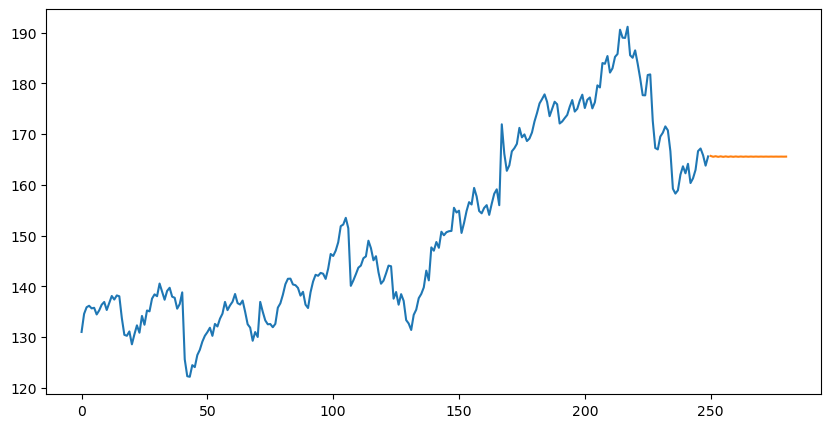

In [48]:
# stats model and arima
from statsmodels.tsa.arima.model import ARIMA
p, d, q = 2, 1, 2

model = ARIMA(df['Close'], order=(p, d, q))
model = model.fit()
# print(model.summary())

# predict next 30 days
forecast = model.predict(len(df["Close"]), len(df['Close'])+30)
# print(forecast)

#plot forecast
plt.figure(figsize=(10, 5))
plt.plot(df['Close'], label='Actual')
plt.plot(forecast, label='Forecast')

In [49]:
# let's run SARIMA
import statsmodels.api as sm
import warnings

p , d, q = 2, 1, 2

model = sm.tsa.statespace.SARIMAX(df['Close'], 
                                  order=(p, d, q), 
                                  seasonal_order=(p, d, q, 12))
model = model.fit()
print(model.summary())

c:\Users\PS144\miniconda3\envs\timeseries_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

c:\Users\PS144\miniconda3\envs\timeseries_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

c:\Users\PS144\miniconda3\envs\timeseries_env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  250
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 12)   Log Likelihood                -582.999
Date:                            Sun, 25 Aug 2024   AIC                           1183.999
Time:                                    21:30:29   BIC                           1215.211
Sample:                                         0   HQIC                          1196.579
                                            - 250                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1261      0.057     19.687      0.000       1.014       1.238
ar.L2         -0.9842      0.048   

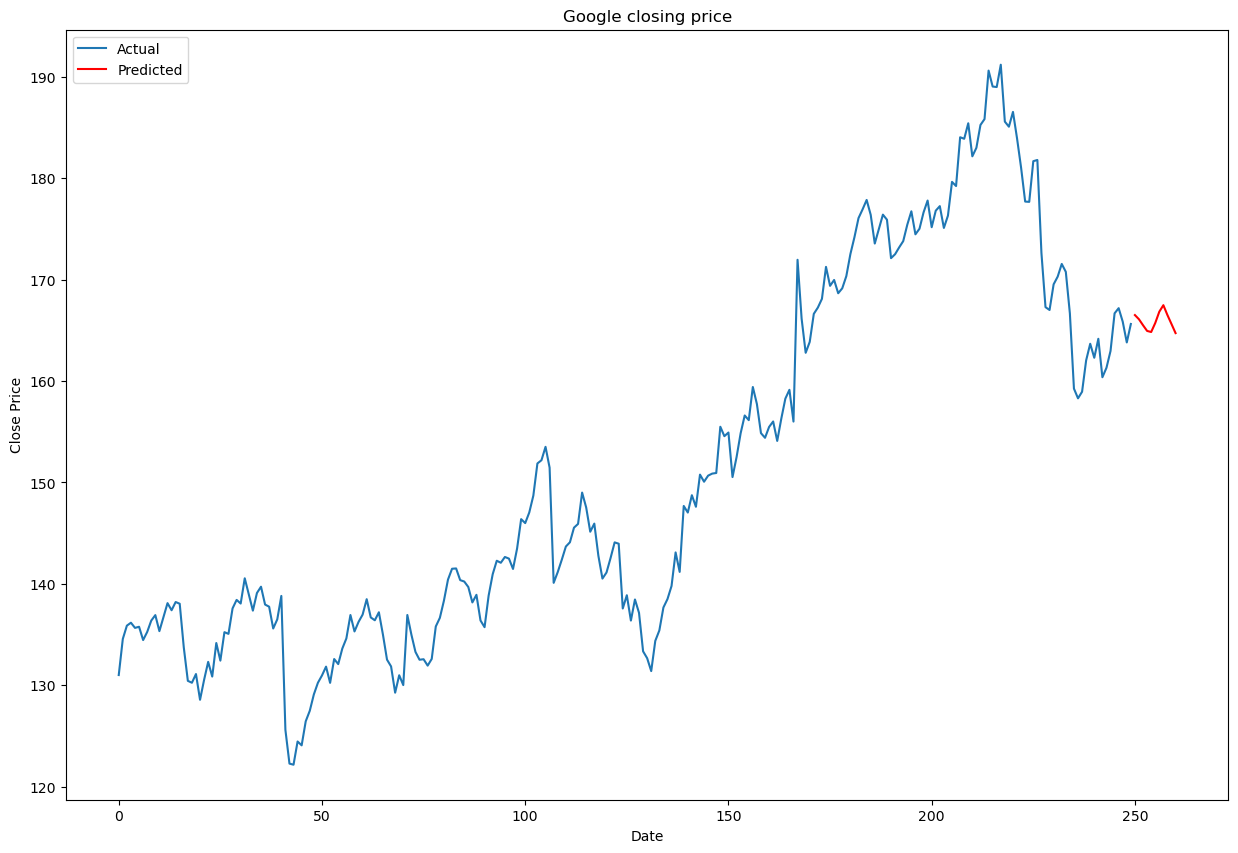

In [50]:
predictions = model.predict(start=len(df['Close']), end=len(df['Close'])+10)

# plot the predictions
plt.figure(figsize=(15, 10))
plt.plot(df["Close"], label='Actual')
plt.plot(predictions, color='red', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Google closing price')
# change legend location
plt.legend(loc='upper left')
plt.show()

c:\Users\PS144\miniconda3\envs\timeseries_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

c:\Users\PS144\miniconda3\envs\timeseries_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

c:\Users\PS144\miniconda3\envs\timeseries_env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



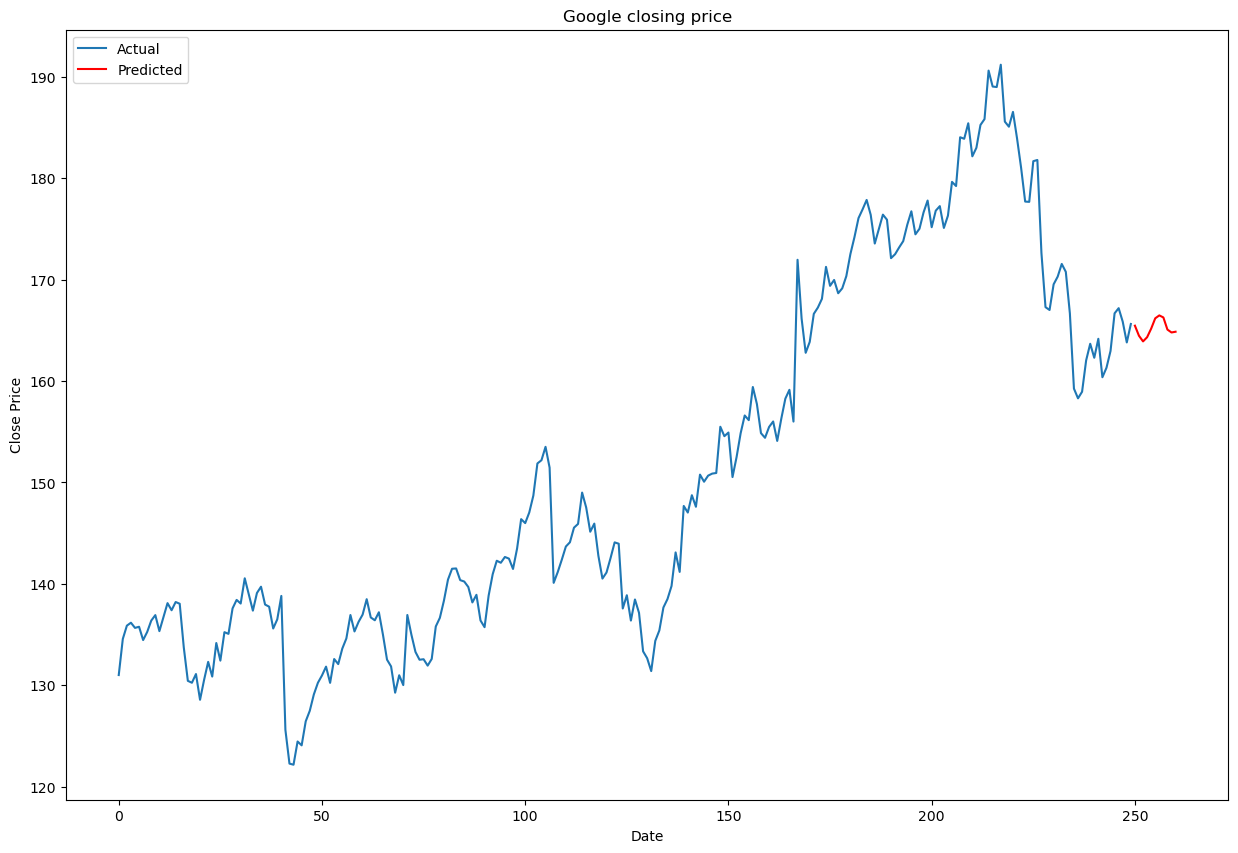

In [51]:
# lets update p, d, q
# let's run SARIMA
import statsmodels.api as sm
import warnings

p , d, q = 3, 1, 2

model = sm.tsa.statespace.SARIMAX(df['Close'], 
                                  order=(p, d, q), 
                                  seasonal_order=(p, d, q, 12))
model = model.fit()
predictions = model.predict(start=len(df['Close']), end=len(df['Close'])+10)

# plot the predictions
plt.figure(figsize=(15, 10))
plt.plot(df["Close"], label='Actual')
plt.plot(predictions, color='red', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Google closing price')
# change legend location
plt.legend(loc='upper left')
plt.show()

## Hyper Parameter Tuning

c:\Users\PS144\miniconda3\envs\timeseries_env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\PS144\miniconda3\envs\timeseries_env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Best SARIMA(0, 1, 1)x(0, 1, 1, 12)12 model - AIC:1115.2870762705352


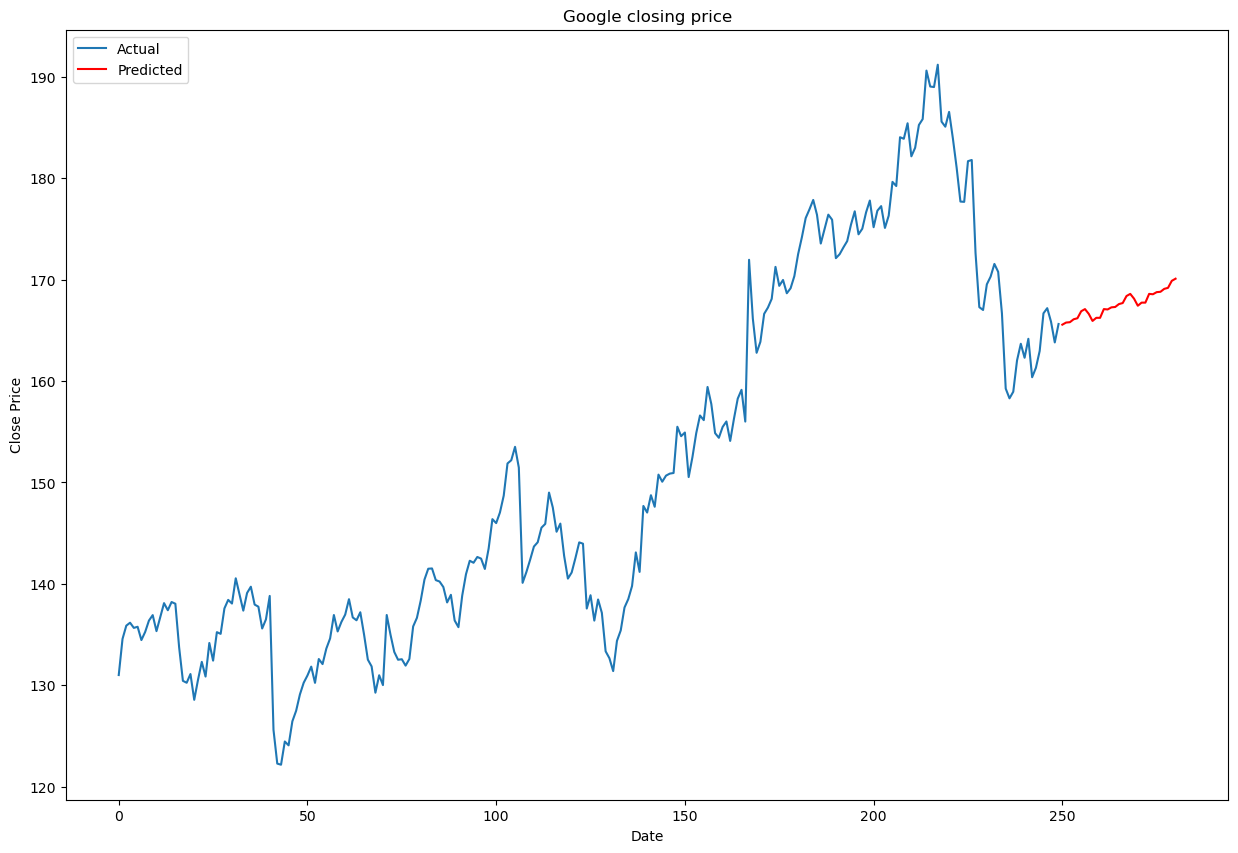

In [52]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import numpy as np
import itertools

# Assume you have a DataFrame 'df' with your time series data in a column named 'value'
# Assume that the seasonal period of your time series data is 12 (e.g., monthly data)

# Define the p, d, q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, d, q and m quadruplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        
        try:
            temp_model = SARIMAX(df['Close'],
                                 order = param,
                                 seasonal_order = param_seasonal,
                                 enforce_stationarity=False,
                                 enforce_invertibility=False)
            results = temp_model.fit()

            # print("SARIMA{}x{}12 - AIC:{}".format(param, param_seasonal, results.aic))
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
        except:
            continue

print("Best SARIMA{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))

# predict next 30 days
model = SARIMAX(df['Close'],
                order = best_pdq,
                seasonal_order = best_seasonal_pdq,
                enforce_stationarity=False,
                enforce_invertibility=False)
model = model.fit()
predictions = model.predict(len(df['Close']), len(df['Close'])+30)
# plot the predictions
plt.figure(figsize=(15, 10))
plt.plot(df["Close"], label='Actual')
plt.plot(predictions, color='red', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Google closing price')
# change legend location
plt.legend(loc='upper left')
plt.show()

In [53]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Close   No. Observations:                  250
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -554.644
Date:                            Sun, 25 Aug 2024   AIC                           1115.287
Time:                                    21:31:15   BIC                           1125.509
Sample:                                         0   HQIC                          1119.413
                                            - 250                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0338      0.057     -0.589      0.556      -0.146       0.079
ma.S.L12      -1.0000    291.865     -0.003      0.997    -573.044     571.044
sigma2         7.4830   2184.274      0.003      0.997   -4273.616    4288.582
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               400.17
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.35   Skew:                            -0.21
Prob(H) (two-sided):                  0.20   Kurtosis:                         9.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""